# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4,sort_keys=True))
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["name"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
       
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.2704,
        "lon": -9.7026
    },
    "dt": 1707164210,
    "id": 2961123,
    "main": {
        "feels_like": 283.56,
        "grnd_level": 1011,
        "humidity": 83,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 284.23,
        "temp_max": 284.23,
        "temp_min": 284.23
    },
    "name": "Tralee",
    "sys": {
        "country": "IE",
        "sunrise": 1707120853,
        "sunset": 1707154278
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 223,
        "gust": 13.11,
        "speed": 5.9
    }
}
Processing Record 2 of Set 1 | grytviken
{
    

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [53]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,284.23,83,100,5.90,Tralee,1707164210
1,grytviken,-54.2811,-36.5092,281.13,66,80,5.59,Grytviken,1707164211
2,qaqortoq,60.7167,-46.0333,252.74,69,0,2.53,Qaqortoq,1707164211
3,waitangi,-43.9535,-176.5597,292.49,89,98,2.24,Waitangi,1707164211
4,afaahiti,-17.7500,-149.2833,301.08,93,100,9.57,Afaahiti,1707164591


In [54]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,284.23,83,100,5.90,Tralee,1707164210
1,grytviken,-54.2811,-36.5092,281.13,66,80,5.59,Grytviken,1707164211
2,qaqortoq,60.7167,-46.0333,252.74,69,0,2.53,Qaqortoq,1707164211
3,waitangi,-43.9535,-176.5597,292.49,89,98,2.24,Waitangi,1707164211
4,afaahiti,-17.7500,-149.2833,301.08,93,100,9.57,Afaahiti,1707164591


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

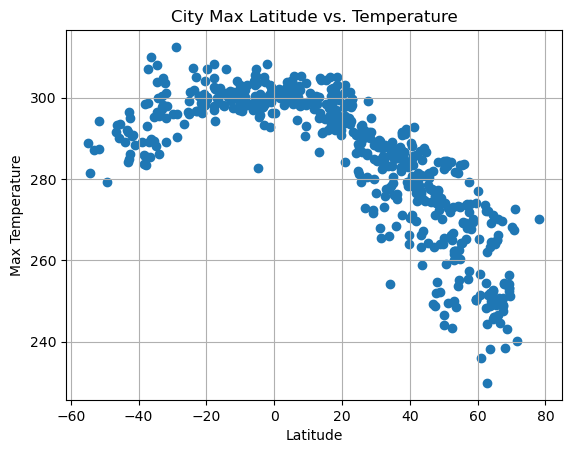

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

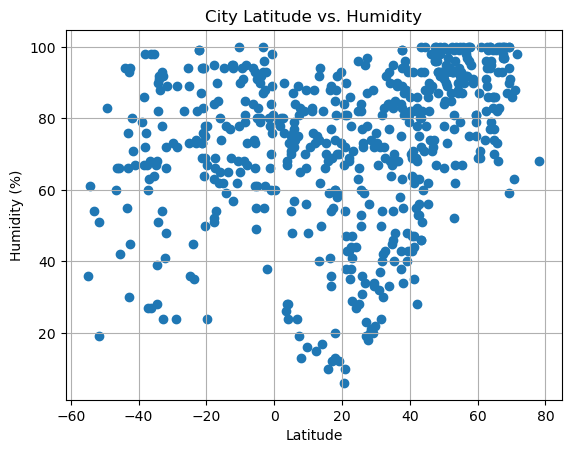

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

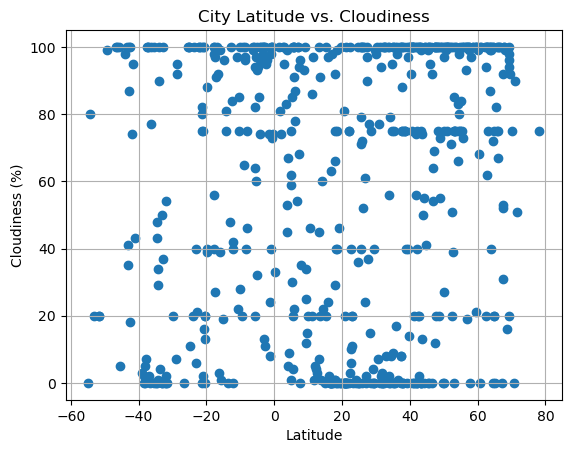

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

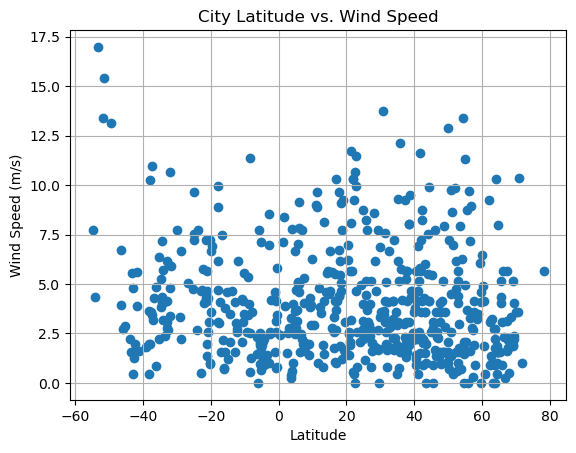

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots /// What would I keep here that I could replicate for each graph?
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress()

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]
# Display sample data
northern_hemi_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
566,glace bay,46.1969,-59.9570,274.18,97,100,3.13,Glace Bay,1707164352
568,yarmouth,41.7057,-70.2286,277.23,60,0,9.83,Yarmouth,1707164180
570,anton lizardo,19.0500,-95.9833,299.27,62,46,9.92,Antón Lizardo,1707164353
571,smithers,54.7804,-127.1743,263.33,92,75,1.54,Smithers,1707164353
572,kayyerkan,69.3786,87.7439,252.06,92,100,2.05,Kayyerkan,1707164353


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
558,puerto aysen,-45.4000,-72.7000,293.91,42,5,3.31,Puerto Aisén,1707164350
563,rocha,-34.4833,-54.3333,300.47,45,48,7.22,Rocha,1707164164
564,eaglehawk,-36.7333,144.2500,284.81,69,0,4.09,Eaglehawk,1707164352
567,vila velha,-20.3297,-40.2925,302.12,82,20,6.69,Vila Velha,1707164352
569,saint-joseph,-21.3667,55.6167,294.36,75,80,4.21,Saint-Joseph,1707164353


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.731892709547595


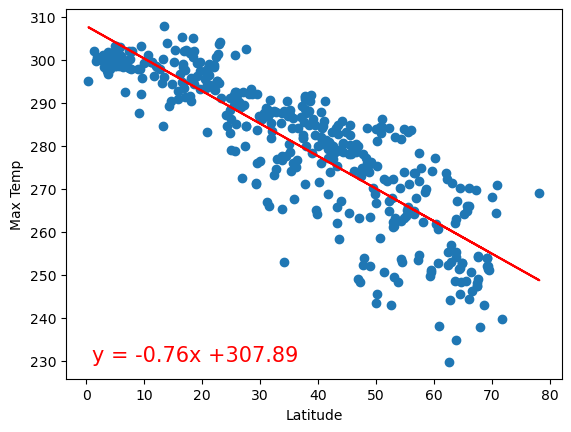

In [88]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
temp = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq,(1,230),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")


The r-value is: 0.4121057168607245


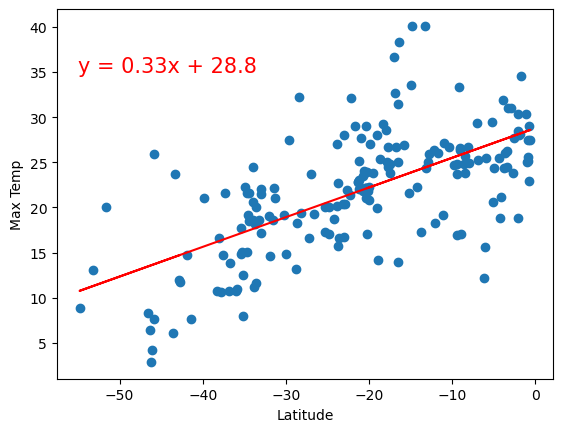

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


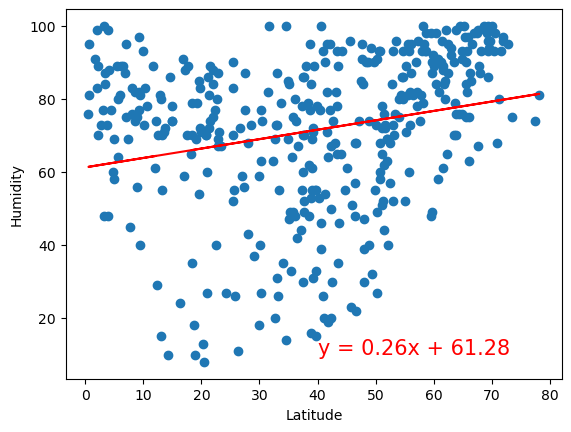

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


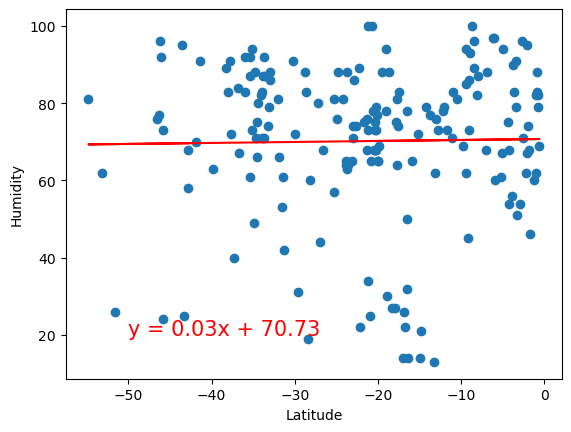

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


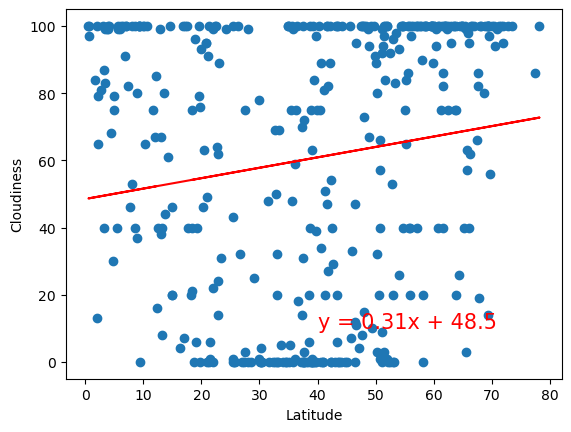

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


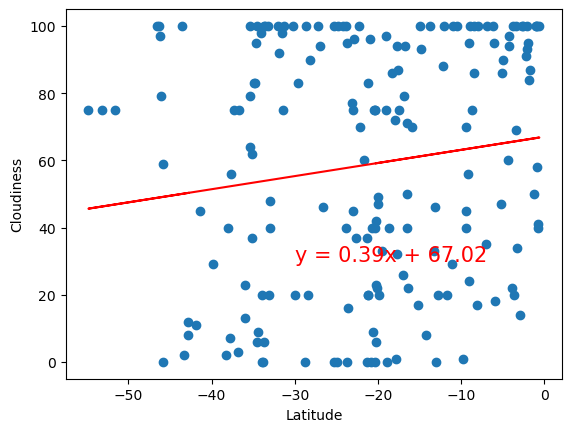

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


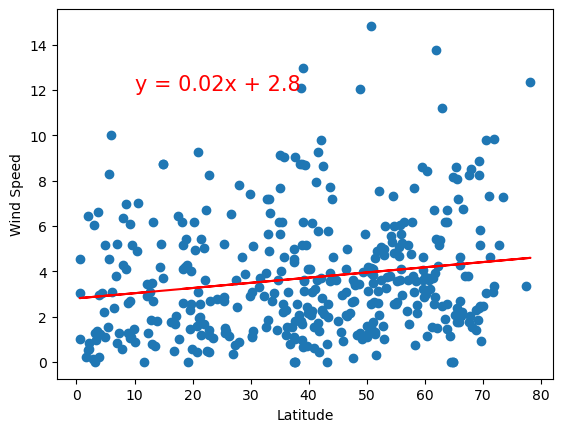

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


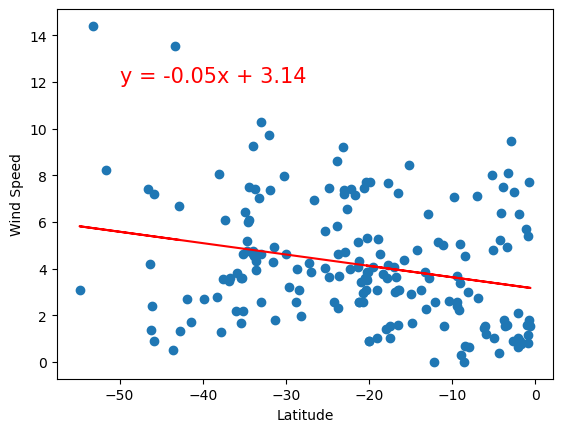

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE